<a href="https://colab.research.google.com/github/ramiro-l/ModelosYSimulacionFAMAF/blob/main/Practico3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practico 3

## Ej1

**a)**

Determinar el período de la secuencia de von Neumann generada a partir de la semilla:

- i)   3009
- ii)  7600
- iii) 1234
- iv)  4321

In [4]:
def vonNeumann(u):
  u= (u**2 // 100) % 10000
  return u

def periodoVonNeumann(semilla):
  secuencia = [semilla]
  next_u = vonNeumann(semilla)
  while next_u not in secuencia:
    secuencia.append(next_u)
    next_u = vonNeumann(next_u)
  return len(secuencia)

In [6]:
print("Respuesta de 1.a)")
print("--------------")
print("3009:", periodoVonNeumann(3009))
print("--------------")
print("7600:", periodoVonNeumann(7600))
print("--------------")
print("1234:", periodoVonNeumann(1234))
print("--------------")
print("4321:", periodoVonNeumann(4321))
print("--------------")

Respuesta de 1.a)
--------------
3009: 4
--------------
7600: 1
--------------
1234: 57
--------------
4321: 71
--------------


**b)**

Dar el valor de $c$ y de $a$ para que cada generador tenga período máximo.
  \begin{align*}
      y_{i+1} &= 5y_i + c \mod (2^5) \\
      x_{i+1} &= a x_i \mod (31)
  \end{align*}

Considerar el generador $z_{i} = y_{i} +x_{i} \mod (2^5)$ y calcular su período.
Representar en tres gráficos separados pares $(y_{i}, y_{i+1}), (x_{i}, x_{i+1}), (z_{i}, z_{i+1})$ .

In [7]:
# Para encontrar el "c" de y_i+1 simplemente debo ver que sea cooprimo con 2**5

def es_coprimo(a, b):
    while b != 0:
        a, b = b, a % b
    return a == 1
list_cooprimos_de_2_5 = []
for i in range(1, 2**5):
  if es_coprimo(i, 2**5):
    list_cooprimos_de_2_5.append(i)

print(list_cooprimos_de_2_5)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]


Entonces $c=3$. Quedando:
  \begin{align*}
      y_{i+1} &= 5y_i + 3 \mod (2^5)
  \end{align*}
Y de esta forma se maximiza el perido con $k=2^5$

In [55]:
# Revisemos esto:
def gen_y(N):
  y = 1
  list = [1]
  for i in range(N):
    y = (5 * y + 3) % (2**5)
    list.append(y)
  return list

res = gen_y(100)

print(res[0:32])
print(res[32:64])

if res[0:32] == res[32:64] == res[64:96]:
  print("El periodo es de:", len(res[0:32]))

[1, 8, 11, 26, 5, 28, 15, 14, 9, 16, 19, 2, 13, 4, 23, 22, 17, 24, 27, 10, 21, 12, 31, 30, 25, 0, 3, 18, 29, 20, 7, 6]
[1, 8, 11, 26, 5, 28, 15, 14, 9, 16, 19, 2, 13, 4, 23, 22, 17, 24, 27, 10, 21, 12, 31, 30, 25, 0, 3, 18, 29, 20, 7, 6]
El periodo es de: 32


Anlaciemos ahora el $x_{i}$, para ello debo encontrar las raices primitivas de $31$.

In [1]:
def factores_primos(n):
    factores = set()
    divisor = 2
    while divisor * divisor <= n:
        while n % divisor == 0:
            factores.add(divisor)
            n //= divisor
        divisor += 1
    if n > 1:
        factores.add(n)
    return list(factores)

def buscar_raices_primitivas(M):
  factores_primos_M = factores_primos(M-1)
  raices_primitivas = []
  for a in range(1, M):
    es_raiz_primitiva = True
    for p in factores_primos_M:
      if a**((M-1)/p) % M == 1:
        es_raiz_primitiva = False
        break
    if es_raiz_primitiva:
      raices_primitivas.append(a)
  return raices_primitivas

In [2]:
print("Raices primitivas de 31:")
print(buscar_raices_primitivas(31))

Raices primitivas de 31:
[3, 11, 12, 13, 17, 19, 21, 22, 24]


In [54]:
# Revisemos esto:
M = 31

def gen_x(N):
  y = 1
  list = [1]
  for i in range(N):
    y = (3 * y) % (M)
    list.append(y)
  return list

k = M - 1
res = gen_x(100)

print(res[0:k])
print(res[k:k*2])

if res[0:k] == res[k:k*2] == res[k*2:k*3]:
  print("El periodo es de:", len(res[0:k]))

[1, 3, 9, 27, 19, 26, 16, 17, 20, 29, 25, 13, 8, 24, 10, 30, 28, 22, 4, 12, 5, 15, 14, 11, 2, 6, 18, 23, 7, 21]
[1, 3, 9, 27, 19, 26, 16, 17, 20, 29, 25, 13, 8, 24, 10, 30, 28, 22, 4, 12, 5, 15, 14, 11, 2, 6, 18, 23, 7, 21]
El periodo es de: 30


Ahora como el perido de $y_i$ es $32$ y el periodo de $x_i$ es $30$ debo calcular $mcm(32,30)$ para saber el periodo de $z_{i} = y_{i} +x_{i} \mod (2^5)$.

In [60]:
import math

def mcm(a, b):
    return abs(a * b) // math.gcd(a, b)

print("Minimo comun multiplo de 32 y 30:",  mcm(32,30))

Minimo comun multiplo de 32 y 30: 480


In [95]:
# Revisemos esto:
def gen_z(N):
  list_gen_y = gen_y(N)
  list_gen_x = gen_x(N)
  y = 1
  list = [y]
  for i in range(N):
    y = (list_gen_y[i] + list_gen_x[i]) % (2**5)
    list.append(y)
  return list

k = mcm(32,30)
res = gen_z(1500)

inicio_del_perido = None
for i in range(0,480):
  if(res[i:i+k] == res[i+k:i+k*2]):
    inicio_del_perido = i
    break

if inicio_del_perido == None:
  print("No se encontro el inicio del periodo")
else:
  print(res[i:i+k])
  print(res[i+k:i+k*2])
  if res[i:i+k] == res[i+k:i+k*2] == res[i+k*2:i+k*3]:
    print("El periodo es de:", len(res[i:i+k]), "(e inicia en las posicion:", inicio_del_perido, ")")

[2, 11, 20, 21, 24, 22, 31, 31, 29, 13, 12, 15, 21, 28, 1, 20, 13, 14, 31, 22, 26, 27, 13, 9, 27, 6, 21, 9, 4, 9, 8, 9, 10, 3, 30, 20, 21, 13, 3, 11, 2, 29, 27, 26, 23, 2, 19, 12, 21, 4, 0, 25, 3, 23, 1, 4, 11, 23, 10, 7, 30, 23, 16, 1, 20, 2, 27, 11, 25, 25, 8, 27, 17, 8, 29, 0, 9, 26, 27, 2, 22, 7, 9, 21, 23, 18, 17, 21, 0, 21, 4, 21, 6, 15, 26, 0, 17, 25, 31, 23, 30, 9, 23, 6, 19, 14, 15, 24, 17, 16, 28, 5, 31, 3, 29, 16, 7, 3, 6, 19, 26, 3, 12, 13, 16, 14, 23, 23, 21, 5, 4, 7, 13, 20, 25, 12, 5, 6, 23, 14, 18, 19, 5, 1, 19, 30, 13, 1, 28, 1, 0, 1, 2, 27, 22, 12, 13, 5, 27, 3, 26, 21, 19, 18, 15, 26, 11, 4, 13, 28, 24, 17, 27, 15, 25, 28, 3, 15, 2, 31, 22, 15, 8, 25, 12, 26, 19, 3, 17, 17, 0, 19, 9, 0, 21, 24, 1, 18, 19, 26, 14, 31, 1, 13, 15, 10, 9, 13, 24, 13, 28, 13, 30, 7, 18, 24, 9, 17, 23, 15, 22, 1, 15, 30, 11, 6, 7, 16, 9, 8, 20, 29, 23, 27, 21, 8, 31, 27, 30, 11, 18, 27, 4, 5, 8, 6, 15, 15, 13, 29, 28, 31, 5, 12, 17, 4, 29, 30, 15, 6, 10, 11, 29, 25, 11, 22, 5, 25, 20, 25, 

Representación grafica:

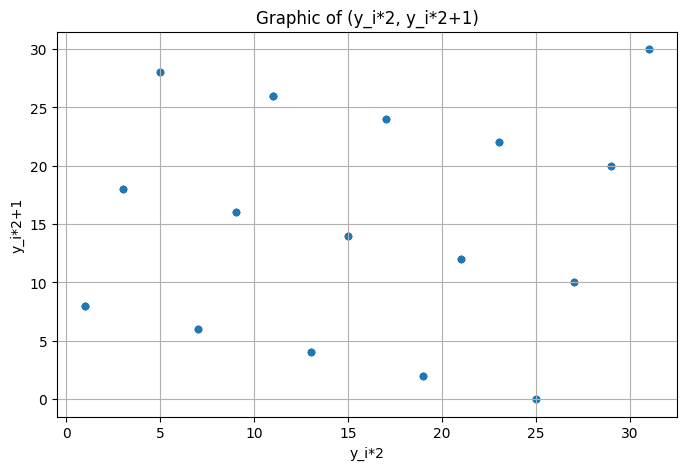

In [96]:
import matplotlib.pyplot as plt

res = gen_y(100)

gen_y_pairs = []
for i in range(0, len(res)//2):
    gen_y_pairs.append((res[i*2], res[i*2+1]))

x_coords_y, y_coords_y = zip(*gen_y_pairs)

plt.figure(figsize=(8, 5))
plt.scatter(x_coords_y, y_coords_y, s=20)
plt.xlabel("y_i*2")
plt.ylabel("y_i*2+1")
plt.title("Graphic of (y_i*2, y_i*2+1)")
plt.grid(True)
plt.show()

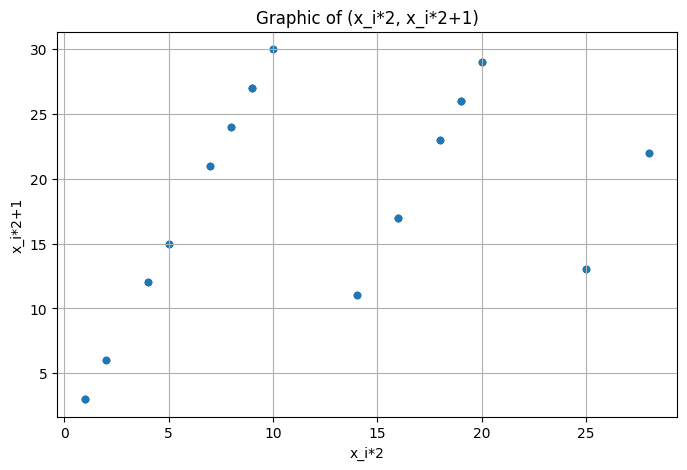

In [97]:
import matplotlib.pyplot as plt

res = gen_x(100)

gen_y_pairs = []
for i in range(0, len(res)//2):
    gen_y_pairs.append((res[i*2], res[i*2+1]))

x_coords_y, y_coords_y = zip(*gen_y_pairs)

plt.figure(figsize=(8, 5))
plt.scatter(x_coords_y, y_coords_y, s=20)
plt.xlabel("x_i*2")
plt.ylabel("x_i*2+1")
plt.title("Graphic of (x_i*2, x_i*2+1)")
plt.grid(True)
plt.show()

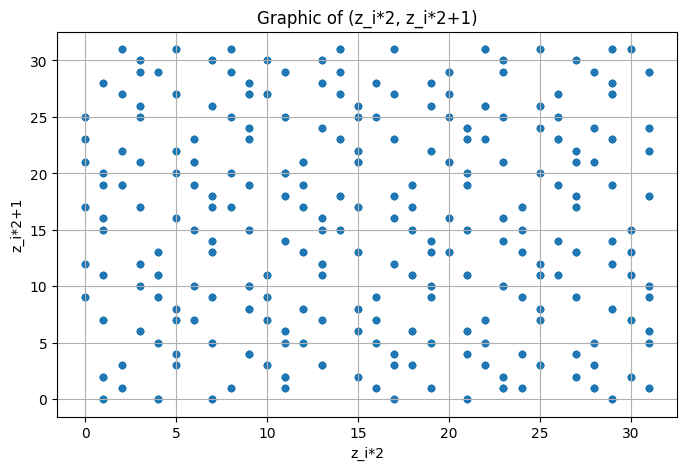

In [101]:
import matplotlib.pyplot as plt

res = gen_z(1500)

gen_y_pairs = []
for i in range(0, len(res)//2):
    gen_y_pairs.append((res[i*2], res[i*2+1]))

x_coords_y, y_coords_y = zip(*gen_y_pairs)

plt.figure(figsize=(8, 5))
plt.scatter(x_coords_y, y_coords_y, s=20)
plt.xlabel("z_i*2")
plt.ylabel("z_i*2+1")
plt.title("Graphic of (z_i*2, z_i*2+1)")
plt.grid(True)
plt.show()

In [ ]:
def randu(a, M, RANGE=20000):
  x = 1
  lista = [x]
  for i in range(RANGE):
    x = (a * x) % M
    lista.append(x)

  return lista

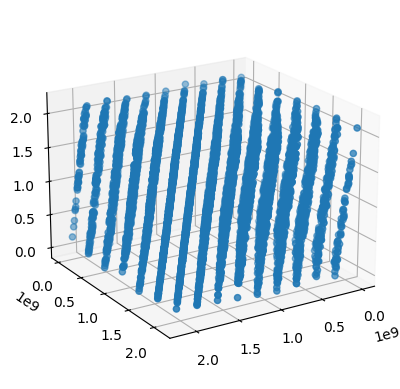

In [ ]:
lista = randu(2**16 + 3, 2**31)

xs = lista[0::3]
ys = lista[1::3]
zs = lista[2::3]

import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.view_init(elev=20, azim=58)

plt.show()

In [ ]:
import math

M = 2**31
RANGE=20000
lista = randu(2**16 + 3, M, RANGE)

xs = lista[0::3]
ys = lista[1::3]
zs = lista[2::3]

contador = 0
M_2 = M/2
for i in range(0, (RANGE+1) // 3):
  if (xs[i] - M_2)**2  + (ys[i] - M_2)**2 + (zs[i] - M_2)**2 <= (M/10)**2:
    contador += 1

print("Cant de puntos estimados en la esfera es:", contador / ((RANGE+1) /3))
print(4 * math.pi / 3000)

Cant de puntos estimados en la esfera es: 0.004349782510874456
0.0041887902047863905
